## Live loss plotting during training

In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git['live'] # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    
import pandas as pd
from neuralprophet import NeuralProphet

In [2]:
data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
df = pd.read_csv(data_location + "retail_sales.csv")

In [3]:
df_train, df_val = NeuralProphet().split_df(df, valid_p=0.1)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.126% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS


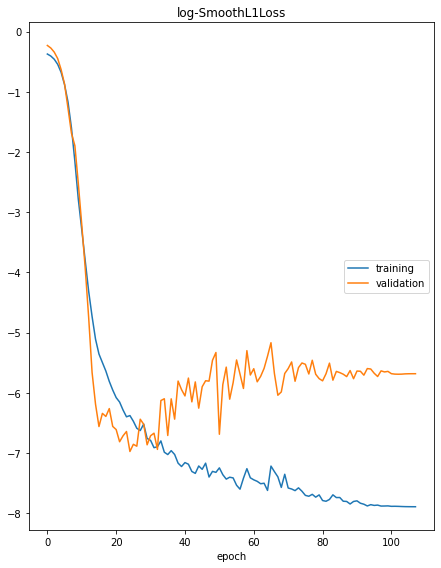

Epoch[108/108]: 100%|█| 108/108 [00:05<00:00, 18.30it/s, SmoothL1Loss=0.000374,


In [4]:
m = NeuralProphet()
metrics = m.fit(df_train, validation_df=df_val, plot_live_loss=True)

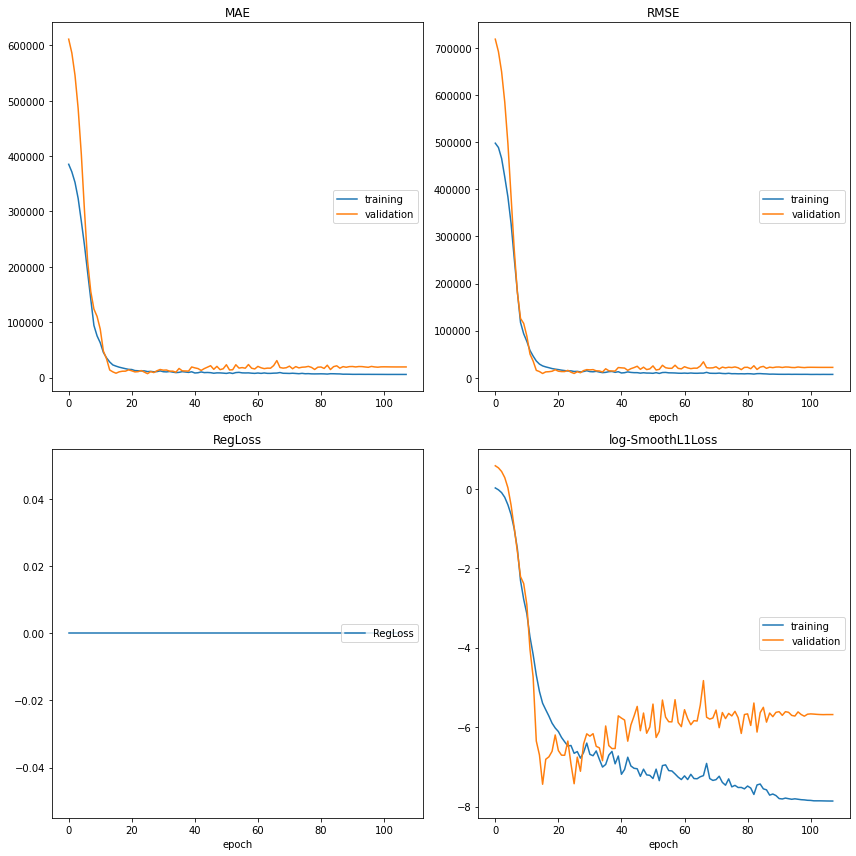

Epoch[108/108]: 100%|█| 108/108 [00:10<00:00, 10.14it/s, SmoothL1Loss=0.000385,


In [5]:
m = NeuralProphet()
metrics = m.fit(df_train, validation_df=df_val, plot_live_loss=True, plot_live_all_metrics=True)

In [6]:
df_train

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068
...,...,...
259,2013-08-01,434950
260,2013-09-01,396199
261,2013-10-01,415740
262,2013-11-01,423611


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.126% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.126% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


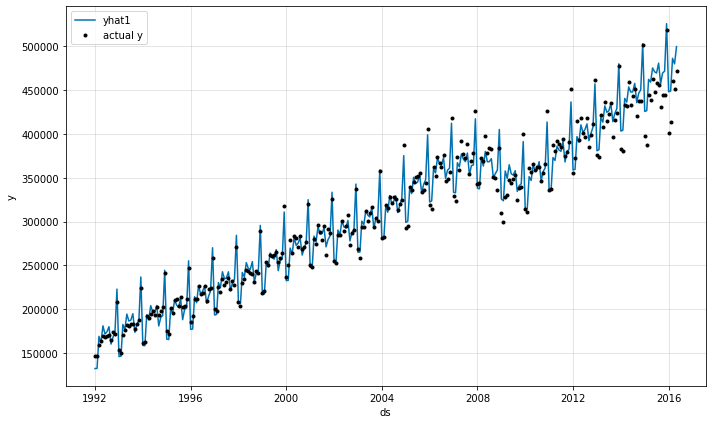

In [7]:
forecast = m.predict(df)
fig = m.plot(forecast)